In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

In [61]:
#warning 메시지 표시 안하게 하기
import warnings
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv('대형차.csv', encoding = 'utf-8')
df.head(30)

,"번호,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류, 가격"
0,"53,토요타 CAMRY Hybrid LE,토요타,휘발유,2494,무단변속,17.5,..."
1,"17,토요타 Camry Hybrid LE,토요타,휘발유,2487,무단변속,17.5,..."
2,"24,렉서스 ES300h,토요타,휘발유,2487,무단변속,17.0,1등급,93.0,..."
3,"52,토요타 Camry Hybrid,토요타,휘발유,2487,무단변속,16.7,1등급..."
4,"23,토요타 Avalon Hybrid,토요타,휘발유,2487,무단변속,16.6,1등..."
5,"39,토요타 CAMRY Hybrid,토요타,휘발유,2494,무단변속,16.4,1등급..."
6,"6,""K7 2.4하이브리드 (PE/17""""타이어)"",기아,휘발유,2359,자동6,1..."
7,"57,그랜저 2.4 하이브리드 (15),현대,휘발유,2359,자동6,16.2,1등급..."
8,"59,""K7 2.4하이브리드 (17""""타이어) (15)"",기아,휘발유,2359,자동..."
9,"99,토요타 RAV4 Hybrid 2WD,토요타,휘발유,2487,무단변속,15.9,..."


In [63]:
df1 = pd.DataFrame(index=range( 0,30 ), columns=[ '번호', '모델명','제조사','유종','배기량','변속형식','복합연비','등급','CO2배출량','분류', '가격' ])

In [64]:
df

,"번호,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류, 가격"
0,"53,토요타 CAMRY Hybrid LE,토요타,휘발유,2494,무단변속,17.5,..."
1,"17,토요타 Camry Hybrid LE,토요타,휘발유,2487,무단변속,17.5,..."
2,"24,렉서스 ES300h,토요타,휘발유,2487,무단변속,17.0,1등급,93.0,..."
3,"52,토요타 Camry Hybrid,토요타,휘발유,2487,무단변속,16.7,1등급..."
4,"23,토요타 Avalon Hybrid,토요타,휘발유,2487,무단변속,16.6,1등..."
5,"39,토요타 CAMRY Hybrid,토요타,휘발유,2494,무단변속,16.4,1등급..."
6,"6,""K7 2.4하이브리드 (PE/17""""타이어)"",기아,휘발유,2359,자동6,1..."
7,"57,그랜저 2.4 하이브리드 (15),현대,휘발유,2359,자동6,16.2,1등급..."
8,"59,""K7 2.4하이브리드 (17""""타이어) (15)"",기아,휘발유,2359,자동..."
9,"99,토요타 RAV4 Hybrid 2WD,토요타,휘발유,2487,무단변속,15.9,..."


In [65]:
df1[ '번호' ], df1[ '모델명' ], df1[ '제조사' ], df1[ '유종' ], df1[ '배기량' ], df1[ '변속형식' ], df1[ '복합연비' ], df1[ '등급' ], df1[ 'CO2배출량' ], df1[ '분류' ], df1[ '가격' ] = df[ '번호,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류, 가격' ].str.split( ',',10 ).str

In [66]:
df1

,번호,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류,가격
0,53,토요타 CAMRY Hybrid LE,토요타,휘발유,2494,무단변속,17.5,1등급,95.0,대형차,4220
1,17,토요타 Camry Hybrid LE,토요타,휘발유,2487,무단변속,17.5,1등급,92.0,대형차,4000
2,24,렉서스 ES300h,토요타,휘발유,2487,무단변속,17.0,1등급,93.0,대형차,6680
3,52,토요타 Camry Hybrid,토요타,휘발유,2487,무단변속,16.7,1등급,95.0,대형차,3870
4,23,토요타 Avalon Hybrid,토요타,휘발유,2487,무단변속,16.6,1등급,96.0,대형차,4740
5,39,토요타 CAMRY Hybrid,토요타,휘발유,2494,무단변속,16.4,1등급,102.0,대형차,3870
6,6,"""K7 2.4하이브리드 (PE/17""""타이어)""",기아,휘발유,2359,자동6,16.2,1등급,97.0,대형차,3975
7,57,그랜저 2.4 하이브리드 (15),현대,휘발유,2359,자동6,16.2,1등급,97.0,대형차,4432
8,59,"""K7 2.4하이브리드 (17""""타이어) (15)""",기아,휘발유,2359,자동6,16.2,1등급,97.0,대형차,3975
9,99,토요타 RAV4 Hybrid 2WD,토요타,휘발유,2487,무단변속,15.9,2등급,101.0,대형차,3590


In [18]:
df1.dtypes

번호        object
모델명       object
제조사       object
유종        object
배기량       object
변속형식      object
복합연비      object
등급        object
CO2배출량    object
분류        object
가격        object
dtype: object

In [29]:
df2 = df1.loc[ :, '배기량'::2 ]
df2

,배기량,복합연비,CO2배출량,가격
0,2494,17.5,95.0,4220
1,2487,17.5,92.0,4000
2,2487,17.0,93.0,6680
3,2487,16.7,95.0,3870
4,2487,16.6,96.0,4740
5,2494,16.4,102.0,3870
6,2359,16.2,97.0,3975
7,2359,16.2,97.0,4432
8,2359,16.2,97.0,3975
9,2487,15.9,101.0,3590


In [30]:
df3 = df2.apply( pd.to_numeric )

In [93]:
df3.dtypes

배기량         int64
복합연비      float64
CO2배출량    float64
가격          int64
dtype: object

In [32]:
df4 = df1.loc[ :, '모델명':'유종' ]

In [41]:
df5 = df3['배기량']
df5

0     2494
1     2487
2     2487
3     2487
4     2487
5     2494
6     2359
7     2359
8     2359
9     2487
10    2487
11    2487
12    2494
13    2143
14    2199
15    2494
16    2199
17    2143
18    2494
19    2199
20    2199
21    2199
22    2143
23    2143
24    2143
25    2199
26    2199
27    2199
28    2199
29    2143
Name: 배기량, dtype: int64

In [43]:
data1 = pd.concat( [ df4, df5 ], axis = 1 )
data1

,모델명,제조사,유종,배기량
0,토요타 CAMRY Hybrid LE,토요타,휘발유,2494
1,토요타 Camry Hybrid LE,토요타,휘발유,2487
2,렉서스 ES300h,토요타,휘발유,2487
3,토요타 Camry Hybrid,토요타,휘발유,2487
4,토요타 Avalon Hybrid,토요타,휘발유,2487
5,토요타 CAMRY Hybrid,토요타,휘발유,2494
6,"""K7 2.4하이브리드 (PE/17""""타이어)""",기아,휘발유,2359
7,그랜저 2.4 하이브리드 (15),현대,휘발유,2359
8,"""K7 2.4하이브리드 (17""""타이어) (15)""",기아,휘발유,2359
9,토요타 RAV4 Hybrid 2WD,토요타,휘발유,2487


In [44]:
df6 = df1['변속형식']

In [46]:
data2 = pd.concat( [ data1, df6 ], axis = 1 )
data2

,모델명,제조사,유종,배기량,변속형식
0,토요타 CAMRY Hybrid LE,토요타,휘발유,2494,무단변속
1,토요타 Camry Hybrid LE,토요타,휘발유,2487,무단변속
2,렉서스 ES300h,토요타,휘발유,2487,무단변속
3,토요타 Camry Hybrid,토요타,휘발유,2487,무단변속
4,토요타 Avalon Hybrid,토요타,휘발유,2487,무단변속
5,토요타 CAMRY Hybrid,토요타,휘발유,2494,무단변속
6,"""K7 2.4하이브리드 (PE/17""""타이어)""",기아,휘발유,2359,자동6
7,그랜저 2.4 하이브리드 (15),현대,휘발유,2359,자동6
8,"""K7 2.4하이브리드 (17""""타이어) (15)""",기아,휘발유,2359,자동6
9,토요타 RAV4 Hybrid 2WD,토요타,휘발유,2487,무단변속


In [49]:
df7 = df3['복합연비']

In [50]:
data3 = pd.concat( [ data2, df7 ], axis = 1 )
data3

,모델명,제조사,유종,배기량,변속형식,복합연비
0,토요타 CAMRY Hybrid LE,토요타,휘발유,2494,무단변속,17.5
1,토요타 Camry Hybrid LE,토요타,휘발유,2487,무단변속,17.5
2,렉서스 ES300h,토요타,휘발유,2487,무단변속,17.0
3,토요타 Camry Hybrid,토요타,휘발유,2487,무단변속,16.7
4,토요타 Avalon Hybrid,토요타,휘발유,2487,무단변속,16.6
5,토요타 CAMRY Hybrid,토요타,휘발유,2494,무단변속,16.4
6,"""K7 2.4하이브리드 (PE/17""""타이어)""",기아,휘발유,2359,자동6,16.2
7,그랜저 2.4 하이브리드 (15),현대,휘발유,2359,자동6,16.2
8,"""K7 2.4하이브리드 (17""""타이어) (15)""",기아,휘발유,2359,자동6,16.2
9,토요타 RAV4 Hybrid 2WD,토요타,휘발유,2487,무단변속,15.9


In [51]:
df8 = df1['등급']

In [52]:
data4 = pd.concat( [ data3, df8 ], axis = 1 )
data4

,모델명,제조사,유종,배기량,변속형식,복합연비,등급
0,토요타 CAMRY Hybrid LE,토요타,휘발유,2494,무단변속,17.5,1등급
1,토요타 Camry Hybrid LE,토요타,휘발유,2487,무단변속,17.5,1등급
2,렉서스 ES300h,토요타,휘발유,2487,무단변속,17.0,1등급
3,토요타 Camry Hybrid,토요타,휘발유,2487,무단변속,16.7,1등급
4,토요타 Avalon Hybrid,토요타,휘발유,2487,무단변속,16.6,1등급
5,토요타 CAMRY Hybrid,토요타,휘발유,2494,무단변속,16.4,1등급
6,"""K7 2.4하이브리드 (PE/17""""타이어)""",기아,휘발유,2359,자동6,16.2,1등급
7,그랜저 2.4 하이브리드 (15),현대,휘발유,2359,자동6,16.2,1등급
8,"""K7 2.4하이브리드 (17""""타이어) (15)""",기아,휘발유,2359,자동6,16.2,1등급
9,토요타 RAV4 Hybrid 2WD,토요타,휘발유,2487,무단변속,15.9,2등급


In [53]:
df9 = df3['CO2배출량']

In [54]:
data5 = pd.concat( [ data4, df9 ], axis = 1 )
data5

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
0,토요타 CAMRY Hybrid LE,토요타,휘발유,2494,무단변속,17.5,1등급,95.0
1,토요타 Camry Hybrid LE,토요타,휘발유,2487,무단변속,17.5,1등급,92.0
2,렉서스 ES300h,토요타,휘발유,2487,무단변속,17.0,1등급,93.0
3,토요타 Camry Hybrid,토요타,휘발유,2487,무단변속,16.7,1등급,95.0
4,토요타 Avalon Hybrid,토요타,휘발유,2487,무단변속,16.6,1등급,96.0
5,토요타 CAMRY Hybrid,토요타,휘발유,2494,무단변속,16.4,1등급,102.0
6,"""K7 2.4하이브리드 (PE/17""""타이어)""",기아,휘발유,2359,자동6,16.2,1등급,97.0
7,그랜저 2.4 하이브리드 (15),현대,휘발유,2359,자동6,16.2,1등급,97.0
8,"""K7 2.4하이브리드 (17""""타이어) (15)""",기아,휘발유,2359,자동6,16.2,1등급,97.0
9,토요타 RAV4 Hybrid 2WD,토요타,휘발유,2487,무단변속,15.9,2등급,101.0


In [56]:
df10 = df1['분류']

In [57]:
data6 = pd.concat( [ data5, df10 ], axis = 1 )
data6

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류
0,토요타 CAMRY Hybrid LE,토요타,휘발유,2494,무단변속,17.5,1등급,95.0,대형차
1,토요타 Camry Hybrid LE,토요타,휘발유,2487,무단변속,17.5,1등급,92.0,대형차
2,렉서스 ES300h,토요타,휘발유,2487,무단변속,17.0,1등급,93.0,대형차
3,토요타 Camry Hybrid,토요타,휘발유,2487,무단변속,16.7,1등급,95.0,대형차
4,토요타 Avalon Hybrid,토요타,휘발유,2487,무단변속,16.6,1등급,96.0,대형차
5,토요타 CAMRY Hybrid,토요타,휘발유,2494,무단변속,16.4,1등급,102.0,대형차
6,"""K7 2.4하이브리드 (PE/17""""타이어)""",기아,휘발유,2359,자동6,16.2,1등급,97.0,대형차
7,그랜저 2.4 하이브리드 (15),현대,휘발유,2359,자동6,16.2,1등급,97.0,대형차
8,"""K7 2.4하이브리드 (17""""타이어) (15)""",기아,휘발유,2359,자동6,16.2,1등급,97.0,대형차
9,토요타 RAV4 Hybrid 2WD,토요타,휘발유,2487,무단변속,15.9,2등급,101.0,대형차


In [58]:
df11 = df3['가격']

In [59]:
data = pd.concat( [ data6, df11 ], axis = 1 )
data

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류,가격
0,토요타 CAMRY Hybrid LE,토요타,휘발유,2494,무단변속,17.5,1등급,95.0,대형차,4220
1,토요타 Camry Hybrid LE,토요타,휘발유,2487,무단변속,17.5,1등급,92.0,대형차,4000
2,렉서스 ES300h,토요타,휘발유,2487,무단변속,17.0,1등급,93.0,대형차,6680
3,토요타 Camry Hybrid,토요타,휘발유,2487,무단변속,16.7,1등급,95.0,대형차,3870
4,토요타 Avalon Hybrid,토요타,휘발유,2487,무단변속,16.6,1등급,96.0,대형차,4740
5,토요타 CAMRY Hybrid,토요타,휘발유,2494,무단변속,16.4,1등급,102.0,대형차,3870
6,"""K7 2.4하이브리드 (PE/17""""타이어)""",기아,휘발유,2359,자동6,16.2,1등급,97.0,대형차,3975
7,그랜저 2.4 하이브리드 (15),현대,휘발유,2359,자동6,16.2,1등급,97.0,대형차,4432
8,"""K7 2.4하이브리드 (17""""타이어) (15)""",기아,휘발유,2359,자동6,16.2,1등급,97.0,대형차,3975
9,토요타 RAV4 Hybrid 2WD,토요타,휘발유,2487,무단변속,15.9,2등급,101.0,대형차,3590


In [60]:
data.dtypes

모델명        object
제조사        object
유종         object
배기량         int64
변속형식       object
복합연비      float64
등급         object
CO2배출량    float64
분류         object
가격          int64
dtype: object

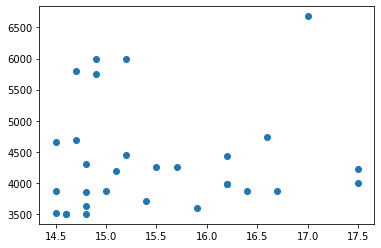

In [105]:
plt.scatter(data['복합연비'],data['가격'])

In [106]:
corr = stats.pearsonr(data.복합연비, data.가격)

In [107]:
corr

(0.07736097477042889, 0.6845010822469794)

In [110]:
n = len(data)
print(n)

30


In [113]:
x = np.array(data['복합연비'])
y = np.array(data['가격'])
p = 1

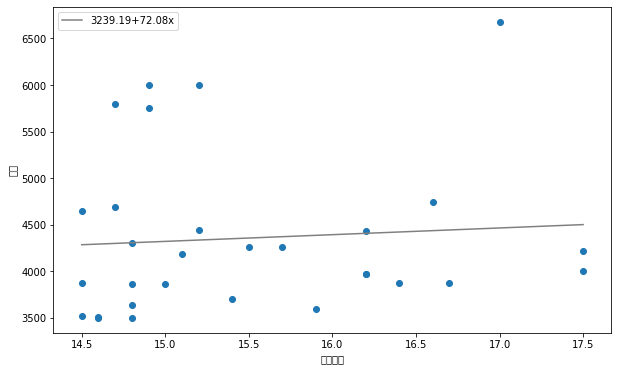

In [114]:
poly_fit = np.polyfit(x, y, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('복합연비')
ax.set_ylabel('가격')
ax.plot(xs, ys, color='gray', 
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x, y)
ax.legend()

plt.show()

In [117]:
# 반응변수 : final_test, 설명변수 : quiz
formula = '가격 ~ 복합연비'
result = smf.ols(formula, data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     가격   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.1686
Date:                Thu, 02 Jul 2020   Prob (F-statistic):              0.685
Time:                        16:31:43   Log-Likelihood:                -244.58
No. Observations:                  30   AIC:                             493.2
Df Residuals:                      28   BIC:                             496.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3239.1934   2722.148      1.190      0.244   -2336.874    8815.261
복합연비          72.0784    175.550      0.411      0.685    -287.519     431.676
==============================================================================
Omnibus:                        9.427   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                8.503
Skew:                           1.282   Prob(JB):                       0.0142
Kurtosis:                       3.480   Cond. No.                         267.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 회귀모델식에서 R-squared가 0.006이고 Prob (F-statistic)가 0.685라 설명력이 없고 유의미하지 않다. 따라서 이 모델은 사용할 수 없다. 

In [109]:
from IPython.display import Image

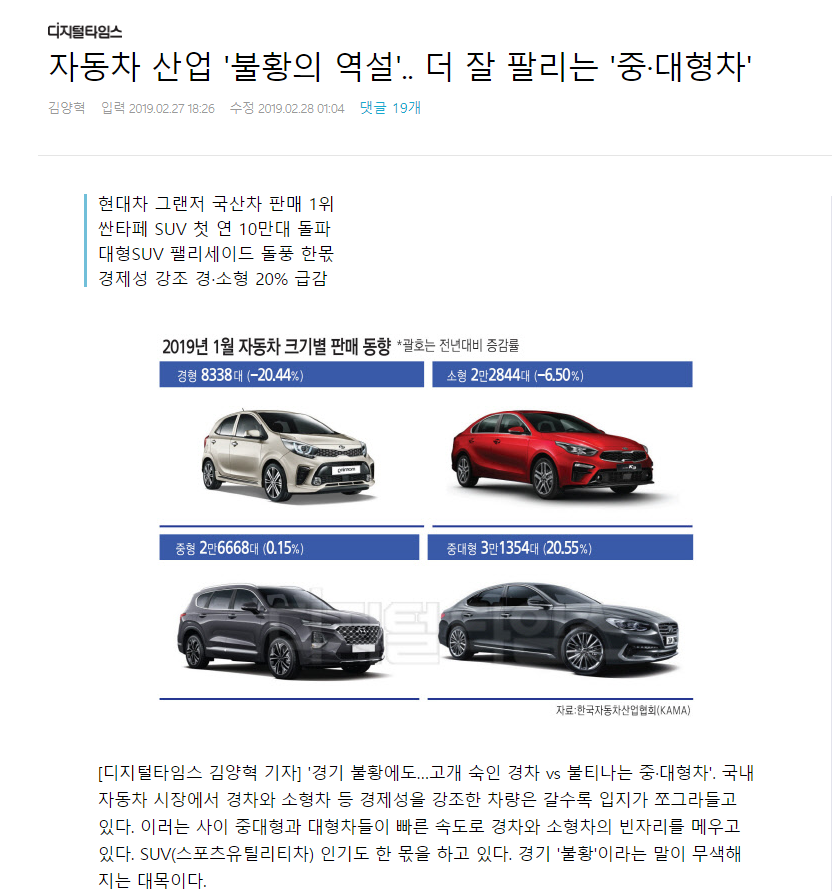

In [118]:
Image("대형차.png")

- 그럼에도 불구하고 대형차의 인기는 줄지 않고 있다. 왜 사람들이 대형차를 사려고 하는지에 대한 조사를 해 보았다.

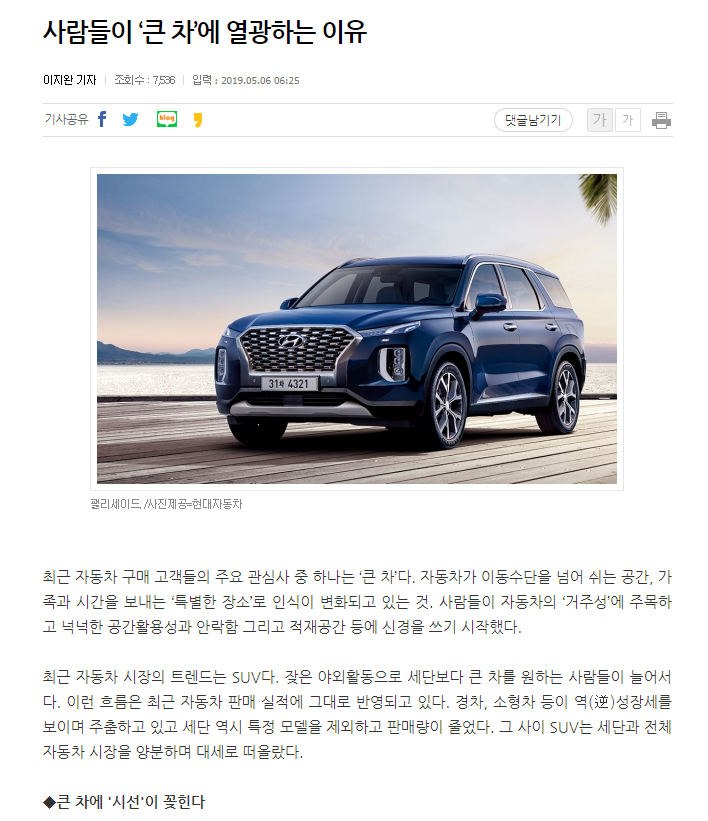

In [119]:
Image("큰차.png")

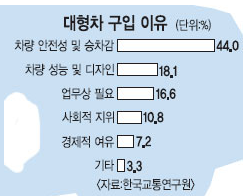

In [120]:
Image("대형차 타는 이유.png")

- 대형차의 경우 연비보다는 차량의 안정성 및 승차감 때문에 타는 경우가 대형차 구입 이유 비중 중 44%를 차지했다. 
- 18.1%의 차량 성능 및 디자인의 경우 차박과 같은 캠핑을 즐기는 사람들이 증가함에 따라 캠핑 용품을 실을 수 있는 넓은 수납 공간을 확보한 대형자동차의 선호도가 증가한 것으로 나타났다.

# 결론

- 대형차의 경우 복합연비와 가격의 상관관계는 유의미하지 않다. 
- 그럼에도 불구하고 대형차의 선호도는 증가하고 있다. 
- 그 이유는 차량 안정성 및 승차감과 차량 성능 및 디자인 때문인 것으로 나타났다.